In [1]:
# Simple feedforward neural network to learn the relationship between x and y  = 2x + 3 using PyTorch
# Import the libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create a class for the model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Define the layers
        self.fc1 = nn.Linear(1, 1)

    def forward(self, x):
        # Define the forward pass
        x = self.fc1(x)
        return x

# Create a function to train the model
def train(model, train_x, train_y, epochs=1000):
    # Define the optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    # Define the loss function
    loss_function = nn.MSELoss()
    # Train the model
    for i in range(epochs):
        # Zero the gradients
        optimizer.zero_grad()
        # Forward pass
        y_pred = model(train_x)
        # Calculate the loss
        loss = loss_function(y_pred, train_y)
        # Backward pass
        loss.backward()
        # Update the weights
        optimizer.step()
        # Print the loss
        if i % 100 == 0:
            print("Epoch: ", i, " Loss: ", loss.item())
    # Create a function to predict the output
    def predict(x):
        return model(x)
    return predict

In [3]:
#Create a function to generate random data
def generate_data(n):
    # Generate random data
    x = np.random.rand(n, 1)
    # Generate the output
    y = 2 * x + 3
    # Convert to tensors
    x = torch.from_numpy(x).float()
    y = torch.from_numpy(y).float()
    return x, y
#Create a function to plot the data
def plot_data(x, y, y_pred):
    # Plot the data
    plt.scatter(x, y, label="Data")
    plt.plot(x, y_pred, color="r", label="Prediction")
    plt.legend()
    plt.show()

In [4]:
# Create a function to plot the model's predictions
def plot_model(model):
    # Generate random data
    x, y = generate_data(100)
    # Predict the output
    y_pred = model(x)
    # Plot the data
    plot_data(x, y, y_pred.detach().numpy())

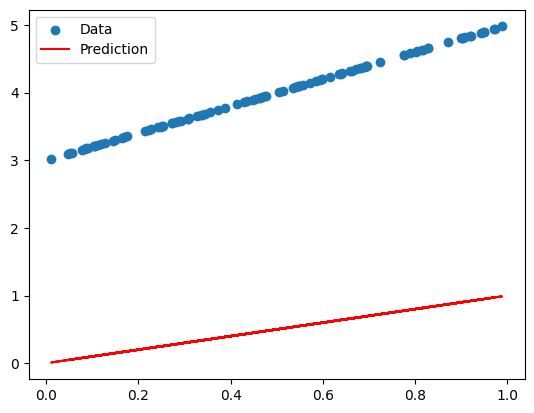

Epoch:  0  Loss:  25.185956954956055
Epoch:  100  Loss:  12.887646675109863
Epoch:  200  Loss:  5.844780921936035
Epoch:  300  Loss:  2.3179819583892822
Epoch:  400  Loss:  0.8011883497238159
Epoch:  500  Loss:  0.2504868805408478
Epoch:  600  Loss:  0.08250225335359573
Epoch:  700  Loss:  0.03837478533387184
Epoch:  800  Loss:  0.02697496861219406
Epoch:  900  Loss:  0.02269531413912773


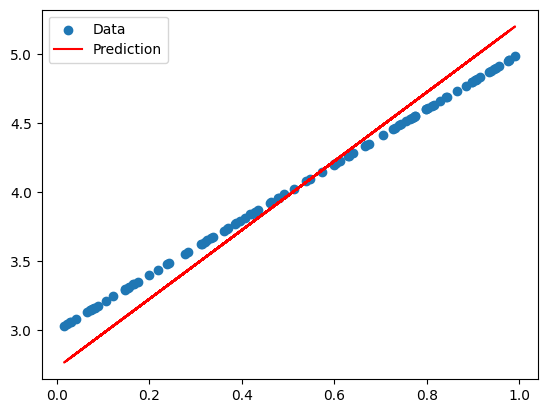

In [5]:
#Create a model
model = Net()
# Generate data
train_x, train_y = generate_data(100)
#Plot the data
plot_data(train_x, train_y, train_x.detach().numpy())
#Train the model
model = train(model, train_x, train_y)
#Plot the model's predictions
plot_model(model)